<br><br>
<font size = '6'><b>LTI Systems with Matlab</b></font>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 50% style="border-style: hidden; border-collapse: collapse;">
             
        </td>
        <td width = 30%>
            Prof. Seungchul Lee<br>iSystems (http://isystems.unist.ac.kr/)<br>UNIST
        </td>
    </tr>
</table>


Table of Contents
<div id="toc"></div>

# 1. Mathematical Models of LTI
- from ebook [_Linear Feedback Control Analysis and Design with MATLAB_](http://epubs.siam.org/doi/book/10.1137/1.9780898718621 "textbook")

## 1.1. Transfer Function (TF)
- Brian Douglas youtube [Control Systems Lectures - Transfer Functions]
- Laplace Transform

In [1]:
%%html
<center><iframe src="https://www.youtube.com/embed/RJleGwXorUk" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

<br>
$$G(s) = \frac{s+5}{s^4+2s^3+3s^2+4s+5}$$

In [2]:
num = [1,5];
den = [1,2,3,4,5];

G = tf(num,den)

G =
 
              s + 5
  -----------------------------
  s^4 + 2 s^3 + 3 s^2 + 4 s + 5
 
Continuous-time transfer function.

$$G(s) = \frac{6(s+5)}{(s^2+3s+1)^2(s+6)(s^3+6s^2+5s+3)}$$

In [3]:
num = 6*[1,5];
den = conv(conv(conv([1,3,1],[1,3,1]),[1,6]),[1,6,5,3]);
G = tf(num,den)

G =
 
                                   6 s + 30
  ---------------------------------------------------------------------------
  s^8 + 18 s^7 + 124 s^6 + 417 s^5 + 740 s^4 + 729 s^3 + 437 s^2 + 141 s + 18
 
Continuous-time transfer function.

## 1.2. Transfer Function in zero-pole-gain model


$$
G(s)=K\frac{(s+z_1)(s+z_2)\cdots(s+z_m)}{(s+p_1)(s+p_2)\cdots(s+p_n)}$$

In [4]:
z = [-1.9294; -0.0353 + 0.9287j; -0.0353 - 0.9287j];
p = [-0.9567 + 1.2272j; -0.9567 - 1.2272j; 0.0433 + 0.6412j; 0.0433 - 0.6412j];
G = zpk(z,p,6)

G =
 
       6 (s+1.929) (s^2 + 0.0706s + 0.8637)
  ----------------------------------------------
  (s^2 - 0.0866s + 0.413) (s^2 + 1.913s + 2.421)
 
Continuous-time zero/pole/gain model.

## 1.3. State-space model

$$
\begin{align*}
\dot{x}(t) &= Ax(t) + Bu(t)\\
y(t) &= Cx(t) + Du(t)
\end{align*}
$$

In [5]:
A = [2.25,-5,-1.25,-0.5;
     2.25,-4.25,-1.25,-0.25;
     0.25,-0.5,-1.25,-1;
     1.25,-1.75,-0.25,-0.75];

B = [4,6;
     2,4;
     2,2;
     0,2];

C = [0,0,0,1;
     0,2,0,2];

D = zeros(2,2);

G = ss(A,B,C,D)

G =
 
  a = 
          x1     x2     x3     x4
   x1   2.25     -5  -1.25   -0.5
   x2   2.25  -4.25  -1.25  -0.25
   x3   0.25   -0.5  -1.25     -1
   x4   1.25  -1.75  -0.25  -0.75
 
  b = 
       u1  u2
   x1   4   6
   x2   2   4
   x3   2   2
   x4   0   2
 
  c = 
       x1  x2  x3  x4
   y1   0   0   0   1
   y2   0   2   0   2
 
  d = 
       u1  u2
   y1   0   0
   y2   0   0
 
Continuous-time state-space model.

**Characteristic polynomial of the system**

In [6]:
G.a

P = poly(G.a)

ans =

    2.2500   -5.0000   -1.2500   -0.5000
    2.2500   -4.2500   -1.2500   -0.2500
    0.2500   -0.5000   -1.2500   -1.0000
    1.2500   -1.7500   -0.2500   -0.7500


P =

    1.0000    4.0000    6.2500    5.2500    2.2500

$$P(s) = s^4+4s^3+6.25s^2+5.25s + 2.25$$

# 2. Interconnected Block Diagrams


series and parallel connections

In [7]:
G1 = tf(1,[1,2,1]);
G1 = zpk(G1);
G2 = tf(1,[1,1]);

G3 = G1+G2;
G4 = G1*G2;
G3 = zpk(G3);        % can be further simplified
G4 = zpk(G4);

## Feedback connection

<img src = "image_files\feedback.png" style="border:1px solid black", width = 500>

- positive feedback $$G(s) = G_1(s)[I-G_2(s)G_1(s)]^{-1}$$


- negative feedback $$G(s) = G_1(s)[I+G_2(s)G_1(s)]^{-1}$$

In [8]:
G1 = tf(1,[1,2,1]);
G2 = tf(1,[1,1]);

% negative feedback
G3 = feedback(G1,G2,-1)
G3 = zpk(G3)

% positive feedback
G4 = feedback(G1,G2,+1)
G4 = zpk(G4)

G3 =
 
          s + 1
  ---------------------
  s^3 + 3 s^2 + 3 s + 2
 
Continuous-time transfer function.


G3 =
 
         (s+1)
  -------------------
  (s+2) (s^2 + s + 1)
 
Continuous-time zero/pole/gain model.


G4 =
 
        s + 1
  -----------------
  s^3 + 3 s^2 + 3 s
 
Continuous-time transfer function.


G4 =
 
       (s+1)
  ----------------
  s (s^2 + 3s + 3)
 
Continuous-time zero/pole/gain model.

## More complicated connections

<img src = "image_files\linear_feedback_structure.png" style="border:1px solid black" width = 500>

$$G_{cl}(s) = \frac{G(s)G_c(S)}{1+H(s)G(s)G_c(S)}$$

In [9]:
G = tf([1,7,24,24],[1,10,35,50,24]);
Gc = tf([10,5],[1,0]);
H = tf(1,[0.01,1]);

Gcl = feedback(Gc*G,H,-1)

G = ss(tf([1,7,24,24],[1,10,35,50,24]));
G_a = feedback(Gc*G,H);
G_a = tf(G_a)

Gcl =
 
      0.1 s^5 + 10.75 s^4 + 77.75 s^3 + 278.6 s^2 + 361.2 s + 120
  --------------------------------------------------------------------
  0.01 s^6 + 1.1 s^5 + 20.35 s^4 + 110.5 s^3 + 325.2 s^2 + 384 s + 120
 
Continuous-time transfer function.


G_a =
 
       10 s^5 + 1075 s^4 + 7775 s^3 + 2.786e04 s^2 + 3.612e04 s + 1.2e04
  ---------------------------------------------------------------------------
  s^6 + 110 s^5 + 2035 s^4 + 1.105e04 s^3 + 3.252e04 s^2 + 3.84e04 s + 1.2e04
 
Continuous-time transfer function.

# 3. Model Conversion 

## 3.1. from state space to transfer function

In [10]:
A = [0 1 0 0;
    0 0 -1 0;
    0 0 0 1;
    0 0 5 0];
B = [0 1 0 -2]';
C = [1 0 0 0];
D = 0;

Gss = ss(A,B,C,D)
Gtf = tf(Gss)

Gss =
 
  a = 
       x1  x2  x3  x4
   x1   0   1   0   0
   x2   0   0  -1   0
   x3   0   0   0   1
   x4   0   0   5   0
 
  b = 
       u1
   x1   0
   x2   1
   x3   0
   x4  -2
 
  c = 
       x1  x2  x3  x4
   y1   1   0   0   0
 
  d = 
       u1
   y1   0
 
Continuous-time state-space model.


Gtf =
 
  s^2 + 1.021e-14 s - 3
  ---------------------
       s^4 - 5 s^2
 
Continuous-time transfer function.

## 3.2. from zpk to tf

In [11]:
Z = [-3 7]';
P = [0 -1.8+1.63j -1.8-1.63j -1 -1]';
K = 6.8;

Gzpk = zpk(Z,P,K)
Gtf = tf(Gzpk)

Gzpk =
 
         6.8 (s+3) (s-7)
  ------------------------------
  s (s+1)^2 (s^2 + 3.6s + 5.897)
 
Continuous-time zero/pole/gain model.


Gtf =
 
             6.8 s^2 - 27.2 s - 142.8
  ----------------------------------------------
  s^5 + 5.6 s^4 + 14.1 s^3 + 15.39 s^2 + 5.897 s
 
Continuous-time transfer function.

## 3.3. from ss to zpk

In [12]:
A = [0 1 0 0; 
    0 0 -1 0; 
    0 0 0 1; 
    0 0 5 0];
B = [0 1 0 -2]'; 
C = [1 0 0 0]; 
D = 0; 

Gss = ss(A,B,C,D)
Gzpk = zpk(Gss)

Gss =
 
  a = 
       x1  x2  x3  x4
   x1   0   1   0   0
   x2   0   0  -1   0
   x3   0   0   0   1
   x4   0   0   5   0
 
  b = 
       u1
   x1   0
   x2   1
   x3   0
   x4  -2
 
  c = 
       x1  x2  x3  x4
   y1   1   0   0   0
 
  d = 
       u1
   y1   0
 
Continuous-time state-space model.


Gzpk =
 
    (s+1.732) (s-1.732)
  -----------------------
  s^2 (s-2.236) (s+2.236)
 
Continuous-time zero/pole/gain model.

## 3.4. from tf to zpk

In [13]:
Z = [-3 -7]'; 
P = [0 -1.8+1.63j -1.8-1.63j -1 -1]';
K = 6.8; 
Gzpk = zpk(Z,P,K); 
Gtf = tf(Gzpk); 
Gzpk = zpk(Gtf)

Gzpk.p{1}
Gzpk.z{1}

Gzpk =
 
         6.8 (s+7) (s+3)
  ------------------------------
  s (s+1)^2 (s^2 + 3.6s + 5.897)
 
Continuous-time zero/pole/gain model.


ans =

   0.0000 + 0.0000i
  -1.8000 + 1.6300i
  -1.8000 - 1.6300i
  -1.0000 + 0.0000i
  -1.0000 + 0.0000i


ans =

   -7.0000
   -3.0000

## 3.5. Similarity Transformation of State Space Model
ss2ss

\begin{align*}
\dot{x}(t) & = Ax(t) + Bu(t)\\
y(t) & = Cx(t) + Du(t) \\
z & = Tx \\
\dot{z}(t) & = TAT^{-1}z(t) + TBu(t)\\
y(t) & = CT^{-1}z(t) + Du(t)
\end{align*}

In [14]:
num = [1 7 24 24]; 
den = [1 10 35 50 24]; 
Gtf = tf(num,den);
Gss = ss(Gtf)

T = fliplr(eye(4)); 
Gss2 = ss2ss(Gss,T)

Gss =
 
  a = 
           x1      x2      x3      x4
   x1     -10  -4.375  -3.125    -1.5
   x2       8       0       0       0
   x3       0       2       0       0
   x4       0       0       1       0
 
  b = 
       u1
   x1   2
   x2   0
   x3   0
   x4   0
 
  c = 
           x1      x2      x3      x4
   y1     0.5  0.4375    0.75    0.75
 
  d = 
       u1
   y1   0
 
Continuous-time state-space model.


Gss2 =
 
  a = 
           x1      x2      x3      x4
   x1       0       1       0       0
   x2       0       0       2       0
   x3       0       0       0       8
   x4    -1.5  -3.125  -4.375     -10
 
  b = 
       u1
   x1   0
   x2   0
   x3   0
   x4   2
 
  c = 
           x1      x2      x3      x4
   y1    0.75    0.75  0.4375     0.5
 
  d = 
       u1
   y1   0
 
Continuous-time state-space model.

# 4. Time Response of LTI

## 4.1. Step response

$$G(s) = \frac{\omega_{n}^{2}}{s^2+2\zeta \omega_{n}s + \omega_{n}^{2}}$$

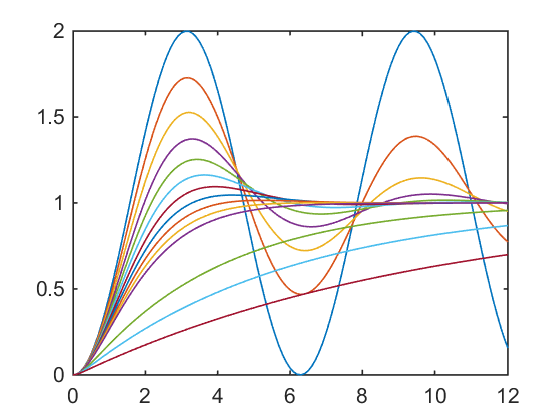

In [15]:
wn = 1; 
yy = []; 
t = 0:.1:12; 
zet = [0:0.1:0.9, 1+eps,2,3,5];
for i = 1:length(zet)
    G = tf(wn^2,[1 2*zet(i)*wn,wn^2]); 
    [y,tout] = step(G,t);
    yy = [yy; y'];
end

plot(tout,yy)

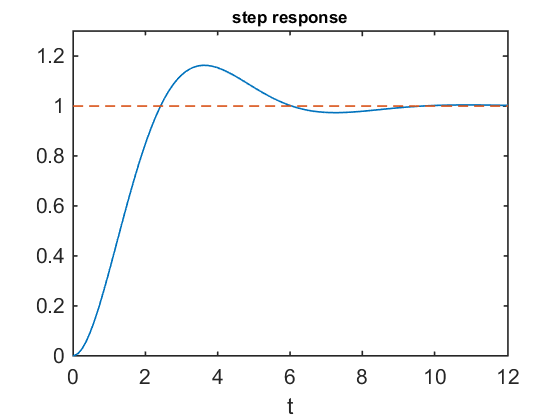

G =
 
       1
  -----------
  s^2 + s + 1
 
Continuous-time transfer function.

In [16]:
z = 0.5; 
wn = 1; 
G = tf(wn^2,[1,2*z*wn,wn^2])
[y,tout] = step(G,12);
plot(tout,y,tout,ones(size(tout)),'--'), axis tight, ylim([0 1.3])
title('step response','fontsize',8)
xlabel('t')

## 4.2. Impluse response

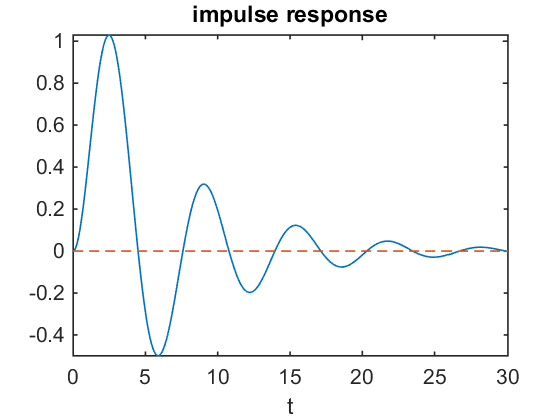

G =
 
               10 s + 20
  ------------------------------------
  10 s^4 + 23 s^3 + 26 s^2 + 23 s + 10
 
Continuous-time transfer function.

In [17]:
G = tf([10 20],[10 23 26 23 10])
[y,tout] = impulse(G, 30);
plot(tout,y,tout,zeros(size(tout)),'--'), axis tight
title('impulse response')
xlabel('t')

## 4.3. General response using `lsim`

In [18]:
A = [-20 -40 -60
       1   0   0
       0   1   0];
B = [1 0 0]';
C = [0 0 1];
D = 0;

sys = ss(A,B,C,D);     % construct a system model

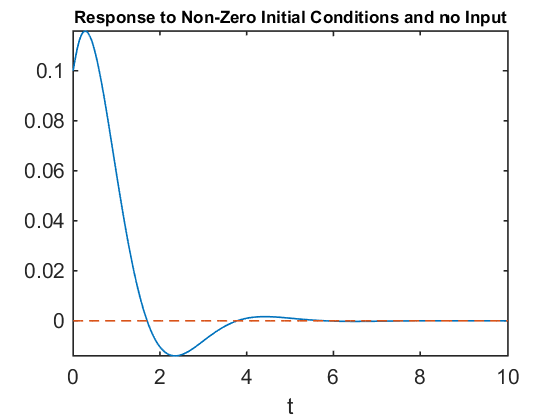

In [19]:
t = 0:0.01:10;         % simulation time = 10 seconds
u = zeros(size(t));    % no input
X0 = [0.1 0.1 0.1];    % initial conditions of the three states

[y,tout] = lsim(sys, u, t, X0);    % simulate and plot the response (the output)
plot(tout,y,tout,zeros(size(tout)),'--'), axis tight
xlabel('t')
title('Response to Non-Zero Initial Conditions and no Input','fontsize',8)

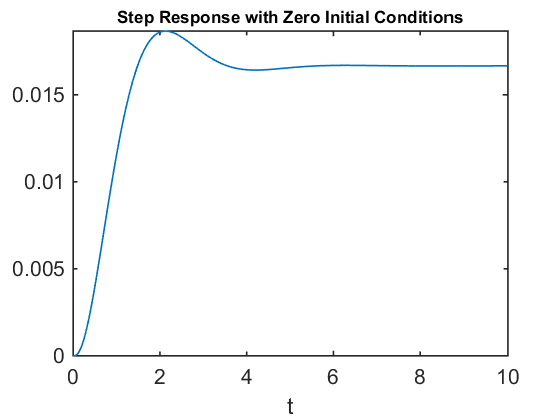

In [20]:
t = 0:0.01:10;                 % simulation time = 10 seconds
u = ones(size(t));             % u = 1, a step input

[y, tout, X] = lsim(sys,u,t);  % simulate

plot(tout,y), axis tight
xlabel('t')
title('Step Response with Zero Initial Conditions','fontsize',8)

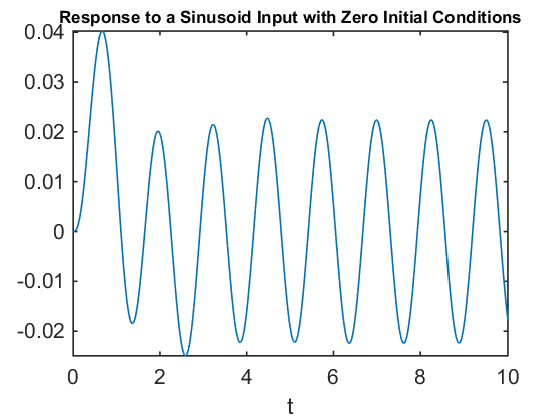

In [21]:
t = 0:0.01:10;                  % simulation time = 10 seconds
u = 10*sin(5*t+1);             % input as a function of time

[y, tout, X] = lsim(sys,u,t);   % simulate
plot(tout,y), axis tight
xlabel('t')
title('Response to a Sinusoid Input with Zero Initial Conditions','fontsize',8)

# 5. Frequency
- from [umich control](http://ctms.engin.umich.edu/CTMS/index.php?example=Introduction&section=SystemAnalysis)

In [22]:
% freqs: Laplace-transform (s-domain) frequency response

a = [1 0.4 1];      % Numerator coefficients
b = [0.2 0.3 1];    % Denominator coefficients
G = tf(a,b)

w = logspace(-1,1); % Frequency vector
[H,W] = freqs(b,a,w);

G =
 
    s^2 + 0.4 s + 1
  -------------------
  0.2 s^2 + 0.3 s + 1
 
Continuous-time transfer function.

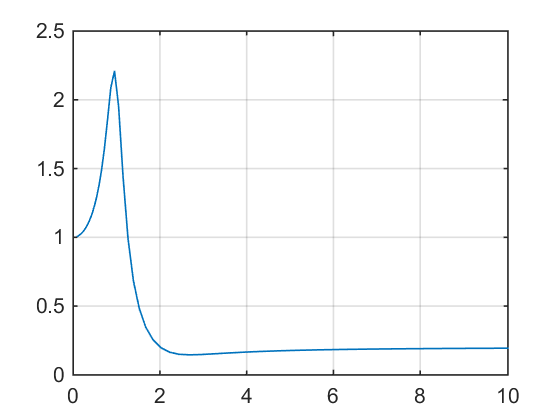

In [23]:
plot(W,abs(H)), grid on

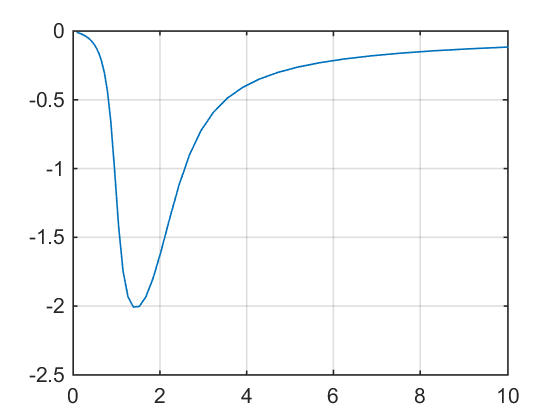

In [24]:
plot(W,phase(H)), grid on

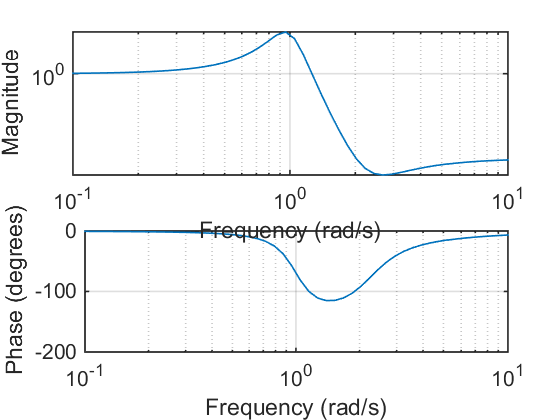

In [25]:
freqs(b,a,w)

## 5.1. Bode plot
- Good reference from Mathworks
    - [understanding Bode plots](https://www.youtube.com/playlist?list=PLn8PRpmsu08poVEWzpqKXpj_c7aSwVDdm "youtube")
    - [using Bode plots](https://www.youtube.com/playlist?list=PLn8PRpmsu08qbUh-mLHxDYAW8ClPdE1H6 "youtube")

- [A serise of Bode plot lectures by Brian Douglas](https://www.youtube.com/watch?v=_eh1conN6YM&index=9&list=PLUMWjy5jgHK1NC52DXXrriwihVrYZKqjk "youtube")

$$G(s) = \frac{\omega_{n}^{2}}{s^2+2\zeta \omega_{n}s + \omega_{n}^{2}}$$

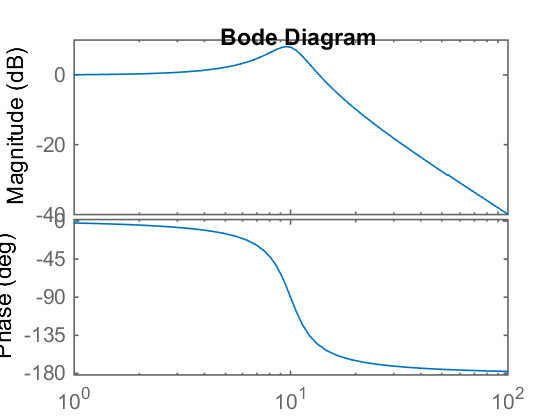

In [26]:
%plot -s 560,420
w_n = 10;
zeta = 0.2;

s = tf('s');
G1 = w_n^2/(s^2 + 2*zeta*w_n*s + w_n^2);

bode(G1)

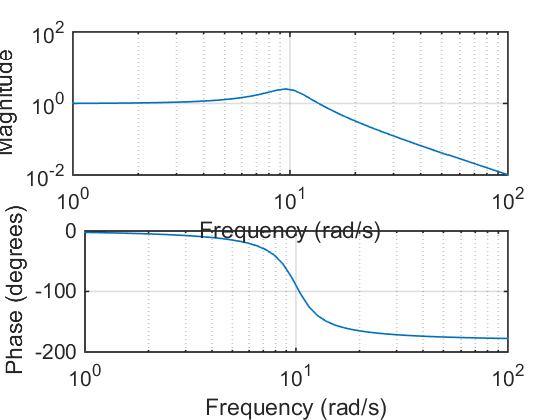

In [27]:
%plot -s 560,420
freqs(w_n^2,[1 2*zeta*w_n w_n^2],logspace(0,2))

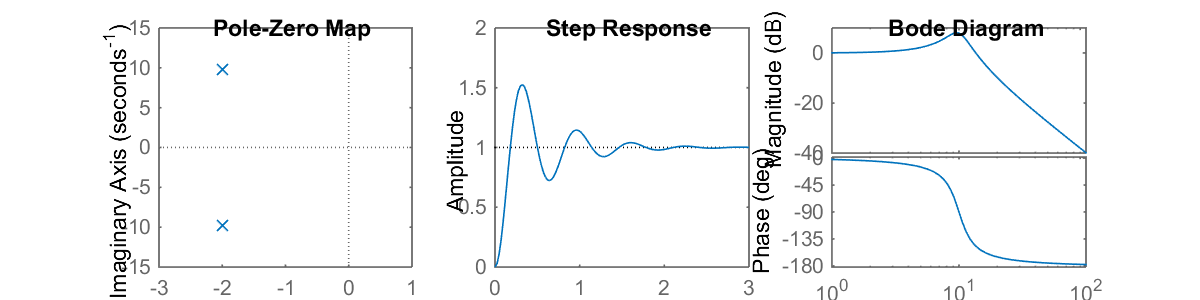

In [28]:
%plot -s 1200,300
subplot(1,3,1), pzmap(G1), axis([-3 1 -15 15])
subplot(1,3,2), step(G1), axis([0 3 0 2])
subplot(1,3,3), bode(G1)

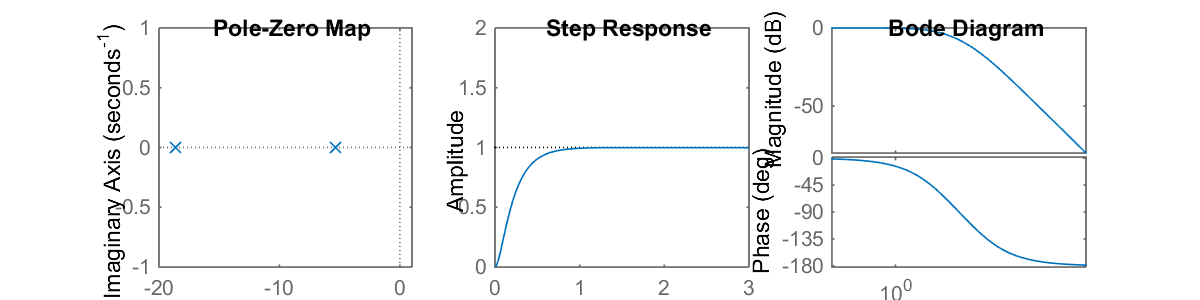

In [29]:
%plot -s 1200,300
w_n = 10;
zeta = 1.2;

s = tf('s');
G1 = w_n^2/(s^2 + 2*zeta*w_n*s + w_n^2);

subplot(1,3,1), pzmap(G1), axis([-20 1 -1 1])
subplot(1,3,2), step(G1), axis([0 3 0 2])
subplot(1,3,3), bode(G1)

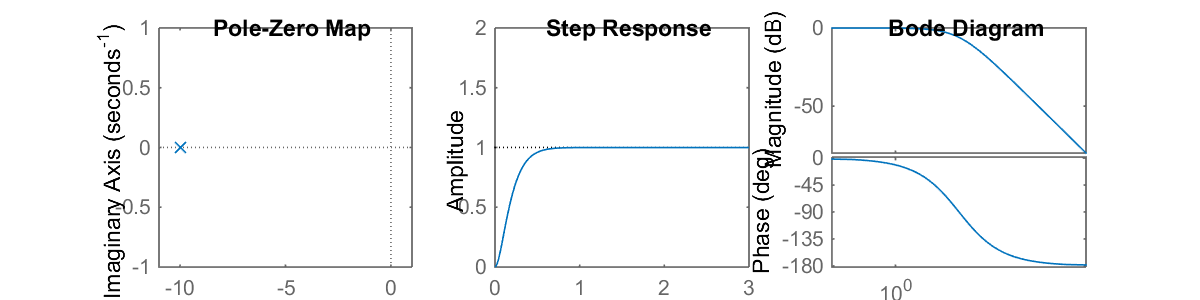

In [30]:
%plot -s 1200,300
w_n = 10;
zeta = 1;

s = tf('s');
G1 = w_n^2/(s^2 + 2*zeta*w_n*s + w_n^2);

subplot(1,3,1), pzmap(G1), axis([-11 1 -1 1])
subplot(1,3,2), step(G1), axis([0 3 0 2])
subplot(1,3,3), bode(G1)

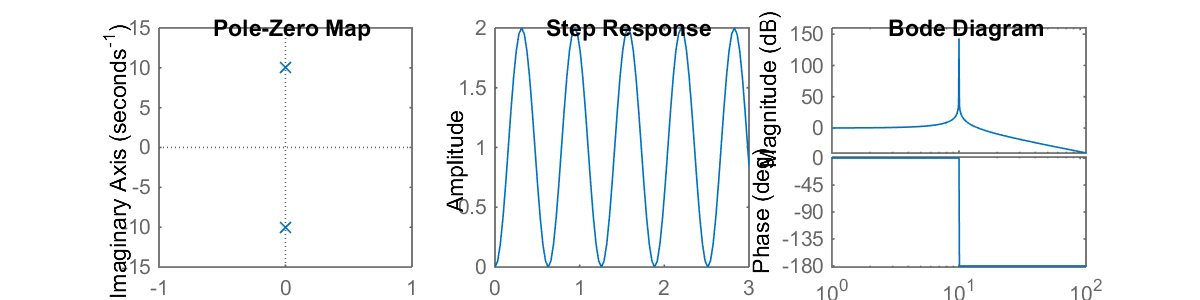

In [31]:
%plot -s 1200,300
w_n = 10;
zeta = 0;

s = tf('s');
G1 = w_n^2/(s^2 + 2*zeta*w_n*s + w_n^2);

subplot(1,3,1), pzmap(G1), axis([-1 1 -15 15])
subplot(1,3,2), step(G1), axis([0 3 0 2])
subplot(1,3,3), bode(G1)

In [32]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>